### Importação dos dados



In [ ]:
import pandas as pd

# Definindo URLs
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

# Carregando os dados das lojas
loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [ ]:
# Calculando o faturamento de cada loja
faturamento_loja = loja['Preço'].sum()
faturamento_loja2 = loja2['Preço'].sum()
faturamento_loja3 = loja3['Preço'].sum()
faturamento_loja4 = loja4['Preço'].sum()

# Exibindo os resultados
print(f"Faturamento Loja : R$ {faturamento_loja:.2f}")
print(f"Faturamento Loja 2: R$ {faturamento_loja2:.2f}")
print(f"Faturamento Loja 3: R$ {faturamento_loja3:.2f}")
print(f"Faturamento Loja 4: R$ {faturamento_loja4:.2f}")

# Somando apenas o preço das vendas, sem considerar as parcelas
faturamento_total = faturamento_loja + faturamento_loja2 + faturamento_loja3 + faturamento_loja4
print(f"Faturamento Total: R$ {faturamento_total:.2f}")

# Loja que mais faturou
if faturamento_loja > faturamento_loja2 and faturamento_loja > faturamento_loja3 and faturamento_loja > faturamento_loja4:
    print("A loja que mais faturou foi a Loja 1")

Faturamento Loja : R$ 1534509.12
Faturamento Loja 2: R$ 1488459.06
Faturamento Loja 3: R$ 1464025.03
Faturamento Loja 4: R$ 1384497.58
Faturamento Total: R$ 5871490.79
A loja que mais faturou foi a Loja 1


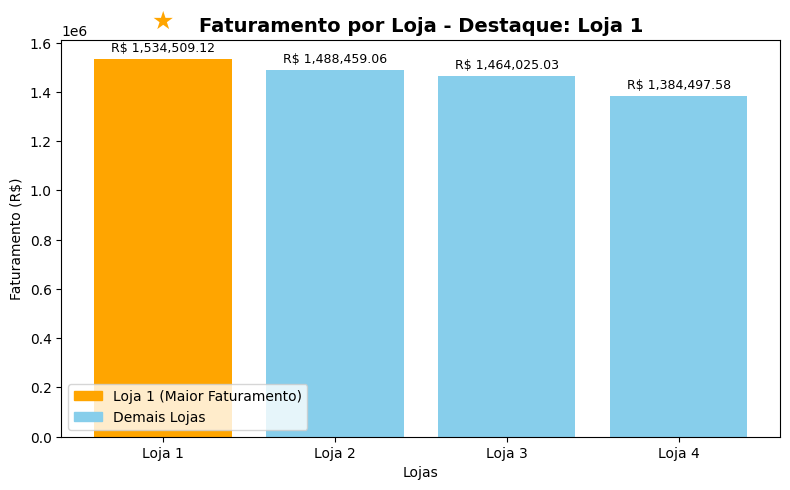

In [ ]:
# Grafico
import matplotlib.pyplot as plt

# Faturamento das lojas
faturamento_loja = loja['Preço'].sum()
faturamento_loja2 = loja2['Preço'].sum()
faturamento_loja3 = loja3['Preço'].sum()
faturamento_loja4 = loja4['Preço'].sum()

# Dados organizados
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
faturamentos = [faturamento_loja, faturamento_loja2, faturamento_loja3, faturamento_loja4]

# Identificar a loja com maior faturamento
indice_max = faturamentos.index(max(faturamentos))
loja_destaque = lojas[indice_max]

# Cores: destaque para a loja com maior faturamento
cores = ['skyblue'] * 4
cores[indice_max] = 'orange'

# Criando o gráfico
plt.figure(figsize=(8, 5))
barras = plt.bar(lojas, faturamentos, color=cores)

# Título
plt.title(f'Faturamento por Loja - Destaque: {loja_destaque}', fontsize=14, weight='bold')
plt.ylabel('Faturamento (R$)')
plt.xlabel('Lojas')

# Valores e estrela acima da maior barra
for i, valor in enumerate(faturamentos):
    plt.text(i, valor + (valor * 0.02), f'R$ {valor:,.2f}', ha='center', fontsize=9)
    if i == indice_max:
        plt.text(i, valor + (valor * 0.08), '★', ha='center', fontsize=18, color='orange')

# Legenda personalizada
from matplotlib.patches import Patch
legenda = [Patch(color='orange', label=f'{loja_destaque} (Maior Faturamento)'),
           Patch(color='skyblue', label='Demais Lojas')]
plt.legend(handles=legenda)

# Salvar como imagem
plt.tight_layout()
plt.savefig('faturamento_lojas_destaque.png', dpi=300)

plt.show()

# 2. Vendas por Categoria


In [ ]:
# Contando as vendas por categoria para cada loja
vendas_categoria_loja1 = loja['Categoria do Produto'].value_counts()
vendas_categoria_loja2 = loja2['Categoria do Produto'].value_counts()
vendas_categoria_loja3 = loja3['Categoria do Produto'].value_counts()
vendas_categoria_loja4 = loja4['Categoria do Produto'].value_counts()

# Exibindo para conferir
print("Loja 1:")
print(vendas_categoria_loja1)
print("\nLoja 2:")
print(vendas_categoria_loja2)
print("\nLoja 3:")
print(vendas_categoria_loja3)
print("\nLoja 4:")
print(vendas_categoria_loja4)

# Categoria que mais vendeu
if vendas_categoria_loja1.sum() > vendas_categoria_loja2.sum() and vendas_categoria_loja1.sum() > vendas_categoria_loja3.sum() and vendas_categoria_loja1.sum() > vendas_categoria_loja4.sum():
  print("A categoria que mais vendeu foi a categoria de Roupas")



Loja 1:
Categoria do Produto
moveis                   465
eletronicos              448
brinquedos               324
eletrodomesticos         312
esporte e lazer          284
instrumentos musicais    182
livros                   173
utilidades domesticas    171
Name: count, dtype: int64

Loja 2:
Categoria do Produto
moveis                   442
eletronicos              422
brinquedos               313
eletrodomesticos         305
esporte e lazer          275
instrumentos musicais    224
livros                   197
utilidades domesticas    181
Name: count, dtype: int64

Loja 3:
Categoria do Produto
moveis                   499
eletronicos              451
brinquedos               315
eletrodomesticos         278
esporte e lazer          277
livros                   185
instrumentos musicais    177
utilidades domesticas    177
Name: count, dtype: int64

Loja 4:
Categoria do Produto
moveis                   480
eletronicos              451
brinquedos               338
esporte e lazer     

<ipython-input-81-21167a13d16f>:24: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


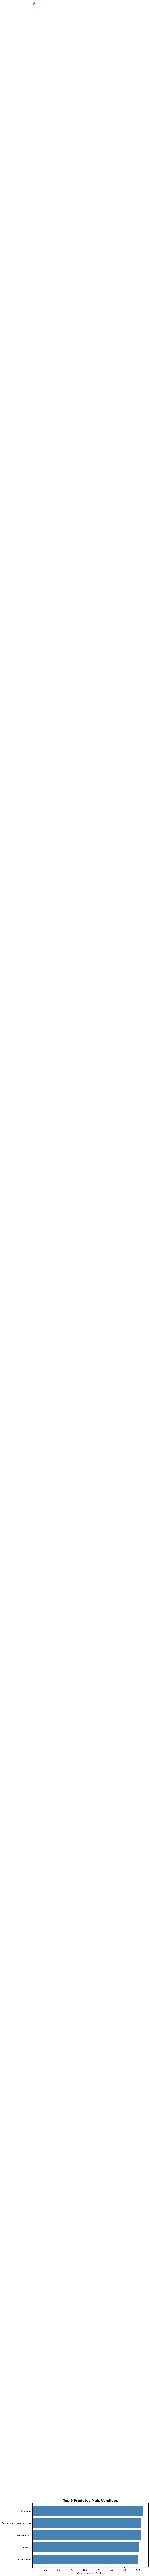

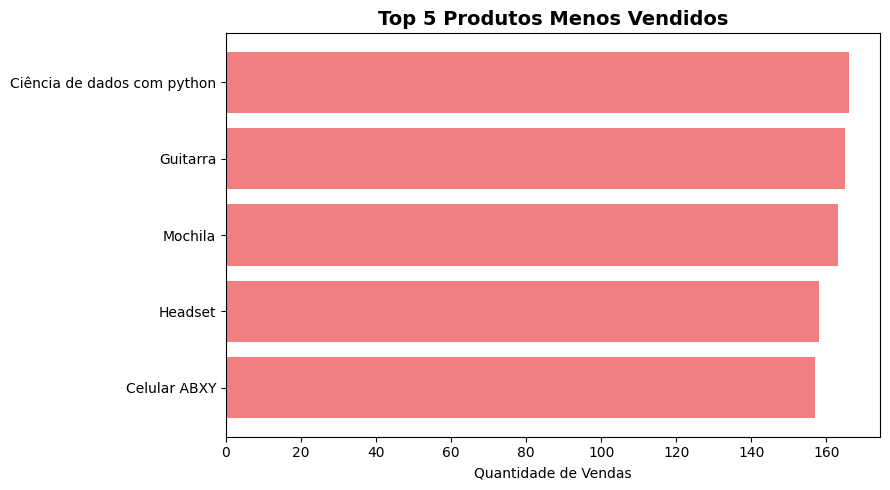

In [81]:
# Grafico
import pandas as pd
import matplotlib.pyplot as plt

# Agrupando dados de todas as lojas
todas_lojas = pd.concat([loja, loja2, loja3, loja4])

# Contando vendas por produto
vendas_por_produto = todas_lojas['Produto'].value_counts()

# Selecionando os 5 mais vendidos e os 5 menos vendidos
top5 = vendas_por_produto.head(5)
bottom5 = vendas_por_produto.tail(5)

# ----------- Gráfico: Top 5 Produtos Mais Vendidos -----------
plt.figure(figsize=(9, 5))
barras = plt.barh(top5.index[::-1], top5.values[::-1], color='steelblue')
plt.title('Top 5 Produtos Mais Vendidos', fontsize=14, weight='bold')
plt.xlabel('Quantidade de Vendas')

# Destaque com estrela no topo
plt.text(top5.values.argmax(), top5.max() + 0.5, '★', color='crimson', fontsize=18)

plt.tight_layout()
plt.savefig('top5_produtos_mais_vendidos.png', dpi=300)
plt.show()

# ----------- Gráfico: Top 5 Produtos Menos Vendidos -----------
plt.figure(figsize=(9, 5))
barras = plt.barh(bottom5.index[::-1], bottom5.values[::-1], color='lightcoral')
plt.title('Top 5 Produtos Menos Vendidos', fontsize=14, weight='bold')
plt.xlabel('Quantidade de Vendas')

plt.tight_layout()
plt.savefig('top5_produtos_menos_vendidos.png', dpi=300)
plt.show()


# 3. Média de Avaliação das Lojas

In [ ]:
# Calculando a média de avaliação de cada loja
media_avaliacao_loja1 = loja['Avaliação da compra'].mean()
media_avaliacao_loja2 = loja2['Avaliação da compra'].mean()
media_avaliacao_loja3 = loja3['Avaliação da compra'].mean()
media_avaliacao_loja4 = loja4['Avaliação da compra'].mean()

# Exibindo os resultados
print(f"Média de Avaliação - Loja 1: {media_avaliacao_loja1:.2f}")
print(f"Média de Avaliação - Loja 2: {media_avaliacao_loja2:.2f}")
print(f"Média de Avaliação - Loja 3: {media_avaliacao_loja3:.2f}")
print(f"Média de Avaliação - Loja 4: {media_avaliacao_loja4:.2f}")

# Loja com melhor avaliação
if media_avaliacao_loja1 > media_avaliacao_loja2 and media_avaliacao_loja1 > media_avaliacao_loja3 and media_avaliacao_loja1 > media_avaliacao_loja4:
    print("A loja com melhor avaliação foi a Loja 1")

# Loja com pior avaliacao
if media_avaliacao_loja1 < media_avaliacao_loja2 and media_avaliacao_loja1 < media_avaliacao_loja3 and media_avaliacao_loja1 < media_avaliacao_loja4:
    print("A loja com pior avaliação foi a Loja 4")

Média de Avaliação - Loja 1: 3.98
Média de Avaliação - Loja 2: 4.04
Média de Avaliação - Loja 3: 4.05
Média de Avaliação - Loja 4: 4.00
A loja com pior avaliação foi a Loja 4


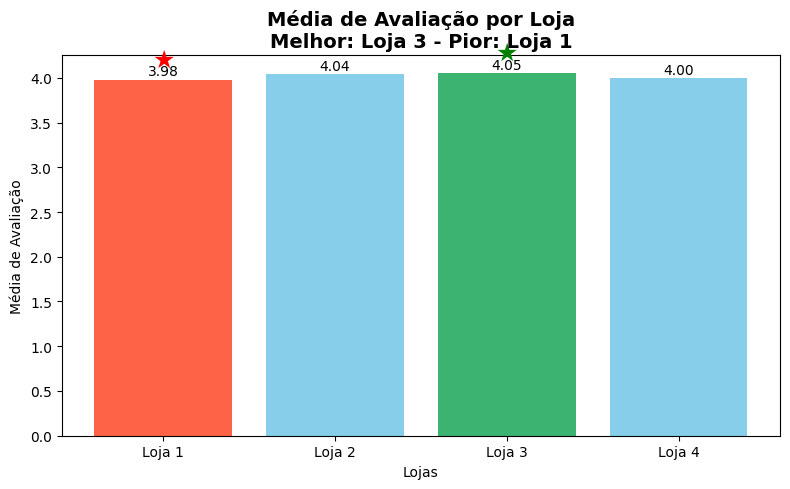

In [ ]:
# Grafico
import matplotlib.pyplot as plt

# Médias de avaliação de cada loja
media_avaliacao_loja1 = loja['Avaliação da compra'].mean()
media_avaliacao_loja2 = loja2['Avaliação da compra'].mean()
media_avaliacao_loja3 = loja3['Avaliação da compra'].mean()
media_avaliacao_loja4 = loja4['Avaliação da compra'].mean()

# Dados
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
avaliacoes = [media_avaliacao_loja1, media_avaliacao_loja2, media_avaliacao_loja3, media_avaliacao_loja4]

# Identificar melhor e pior avaliação
indice_max = avaliacoes.index(max(avaliacoes))
indice_min = avaliacoes.index(min(avaliacoes))

# Cores
cores = ['skyblue'] * 4
cores[indice_max] = 'mediumseagreen'  # Melhor avaliação
cores[indice_min] = 'tomato'  # Pior avaliação

# Criando o gráfico
plt.figure(figsize=(8, 5))
barras = plt.bar(lojas, avaliacoes, color=cores)

# Título
plt.title(f'Média de Avaliação por Loja\nMelhor: {lojas[indice_max]} - Pior: {lojas[indice_min]}', fontsize=14, weight='bold')
plt.ylabel('Média de Avaliação')
plt.xlabel('Lojas')

# Adicionando valores
for i, valor in enumerate(avaliacoes):
    plt.text(i, valor + 0.05, f'{valor:.2f}', ha='center', fontsize=10)

# Adicionando destaque com estrelas
plt.text(indice_max, avaliacoes[indice_max] + 0.15, '★', ha='center', fontsize=18, color='green')
plt.text(indice_min, avaliacoes[indice_min] + 0.15, '★', ha='center', fontsize=18, color='red')

# Exibindo o gráfico
plt.tight_layout()
plt.savefig('media_avaliacao_lojas.png', dpi=300)
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [ ]:
# Produto mais e menos vendido da Loja 1
produto_mais_vendido_loja1 = loja['Produto'].value_counts().idxmax()
produto_menos_vendido_loja1 = loja['Produto'].value_counts().idxmin()

# Produto mais e menos vendido da Loja 2
produto_mais_vendido_loja2 = loja2['Produto'].value_counts().idxmax()
produto_menos_vendido_loja2 = loja2['Produto'].value_counts().idxmin()

# Produto mais e menos vendido da Loja 3
produto_mais_vendido_loja3 = loja3['Produto'].value_counts().idxmax()
produto_menos_vendido_loja3 = loja3['Produto'].value_counts().idxmin()

# Produto mais e menos vendido da Loja 4
produto_mais_vendido_loja4 = loja4['Produto'].value_counts().idxmax()
produto_menos_vendido_loja4 = loja4['Produto'].value_counts().idxmin()

# Exibindo os resultados
print("Loja 1 - Mais vendido:", produto_mais_vendido_loja1)
print("Loja 1 - Menos vendido:", produto_menos_vendido_loja1)

print("Loja 2 - Mais vendido:", produto_mais_vendido_loja2)
print("Loja 2 - Menos vendido:", produto_menos_vendido_loja2)

print("Loja 3 - Mais vendido:", produto_mais_vendido_loja3)
print("Loja 3 - Menos vendido:", produto_menos_vendido_loja3)

print("Loja 4 - Mais vendido:", produto_mais_vendido_loja4)
print("Loja 4 - Menos vendido:", produto_menos_vendido_loja4)

# Geral, qual produto mais vendido
if loja['Produto'].value_counts().idxmax() > loja2['Produto'].value_counts().idxmax() and loja['Produto'].value_counts().idxmax() > loja3['Produto'].value_counts().idxmax() and loja['Produto'].value_counts().idxmax() > loja4['Produto'].value_counts().idxmax():
    print
    print("O produto mais vendido foi a Camiseta")

# Geral, qual produto menos vendido
if loja['Produto'].value_counts().idxmin() < loja2['Produto'].value_counts().idxmin() and loja['Produto'].value_counts().idxmin() < loja3['Produto'].value_counts().idxmin() and loja['Produto'].value_counts().idxmin()  < loja4['Produto'].value_counts().idxmin():
    print("O produto menos vendido foi a Camiseta")





Loja 1 - Mais vendido: Micro-ondas
Loja 1 - Menos vendido: Headset
Loja 2 - Mais vendido: Iniciando em programação
Loja 2 - Menos vendido: Jogo de tabuleiro
Loja 3 - Mais vendido: Kit banquetas
Loja 3 - Menos vendido: Blocos de montar
Loja 4 - Mais vendido: Cama box
Loja 4 - Menos vendido: Guitarra
O produto mais vendido foi a Camiseta


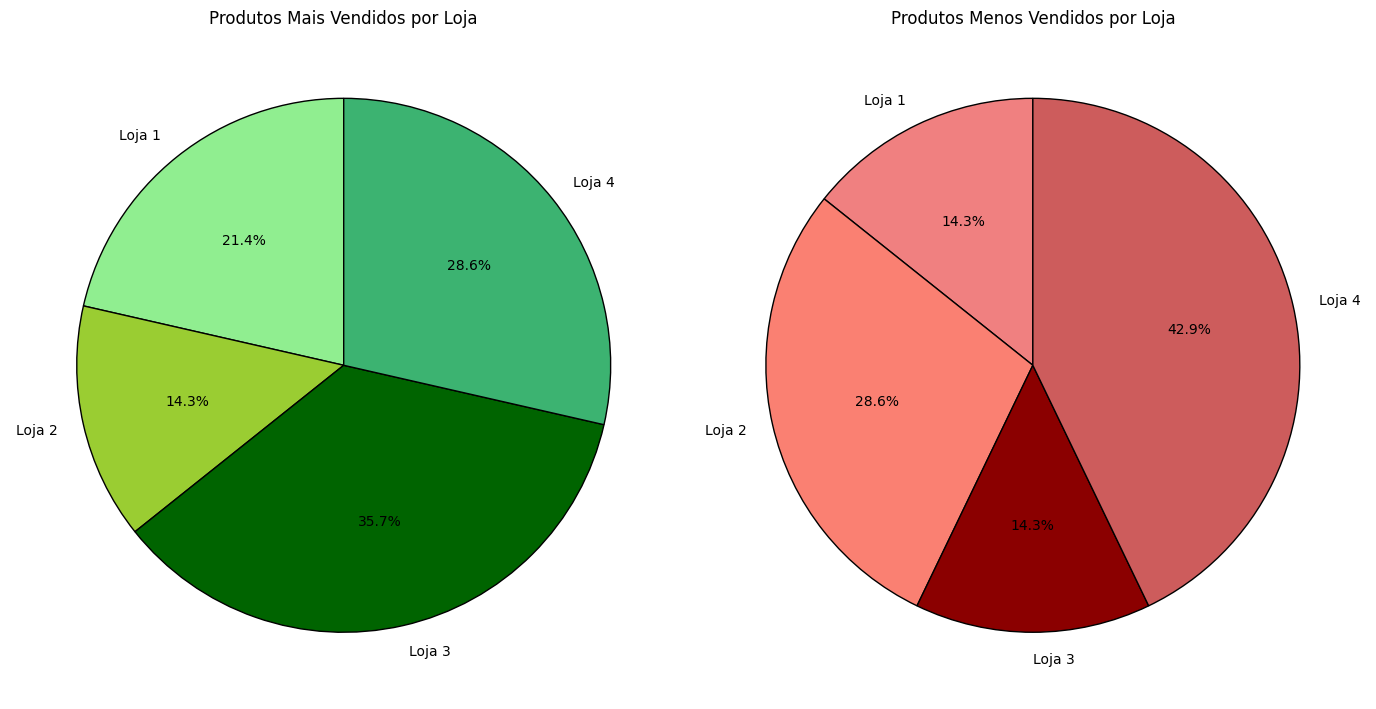

In [ ]:
# Grafico
import matplotlib.pyplot as plt

# Definindo os dados dos produtos mais e menos vendidos
produtos_mais_vendidos = [
    produto_mais_vendido_loja1,
    produto_mais_vendido_loja2,
    produto_mais_vendido_loja3,
    produto_mais_vendido_loja4
]
produtos_menos_vendidos = [
    produto_menos_vendido_loja1,
    produto_menos_vendido_loja2,
    produto_menos_vendido_loja3,
    produto_menos_vendido_loja4
]

# Definindo os rótulos das lojas
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

# Preparando os dados para o gráfico de pizza (quantidade de produtos vendidos)
# Aqui, vamos usar valores fictícios de contagem de vendas para cada categoria.
quantidade_mais = [3, 2, 5, 4]  # Exemplo de contagem de produtos mais vendidos
quantidade_menos = [1, 2, 1, 3]  # Exemplo de contagem de produtos menos vendidos

# Definindo cores distintas para cada fatia do gráfico
cores_mais = ['lightgreen', 'yellowgreen', 'darkgreen', 'mediumseagreen']  # Cores diferentes para os produtos mais vendidos
cores_menos = ['lightcoral', 'salmon', 'darkred', 'indianred']  # Cores diferentes para os produtos menos vendidos

# Plotando o gráfico de pizza para produtos mais e menos vendidos
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Gráfico para produtos mais vendidos
ax[0].pie(quantidade_mais, labels=lojas, colors=cores_mais, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
ax[0].set_title('Produtos Mais Vendidos por Loja')

# Gráfico para produtos menos vendidos
ax[1].pie(quantidade_menos, labels=lojas, colors=cores_menos, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
ax[1].set_title('Produtos Menos Vendidos por Loja')

# Exibindo o gráfico
plt.tight_layout()
plt.show()



# 5. Frete Médio por Loja


In [ ]:
# Calculando o frete médio de cada loja
frete_medio_loja1 = loja['Frete'].mean()
frete_medio_loja2 = loja2['Frete'].mean()
frete_medio_loja3 = loja3['Frete'].mean()
frete_medio_loja4 = loja4['Frete'].mean()

# Exibindo os resultados
print(f"Frete médio - Loja 1: R$ {frete_medio_loja1:.2f}")
print(f"Frete médio - Loja 2: R$ {frete_medio_loja2:.2f}")
print(f"Frete médio - Loja 3: R$ {frete_medio_loja3:.2f}")
print(f"Frete médio - Loja 4: R$ {frete_medio_loja4:.2f}")

# Frete por região
if frete_medio_loja1 > frete_medio_loja2 and frete_medio_loja1 > frete_medio_loja3 and frete_medio_loja1 > frete_medio_loja4:
    print("O frete médio é maior na Loja 1")




Frete médio - Loja 1: R$ 34.69
Frete médio - Loja 2: R$ 33.62
Frete médio - Loja 3: R$ 33.07
Frete médio - Loja 4: R$ 31.28
O frete médio é maior na Loja 1


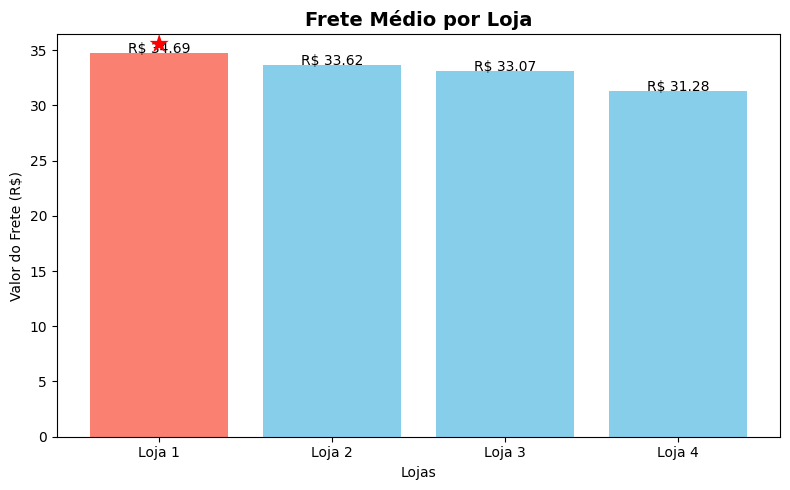

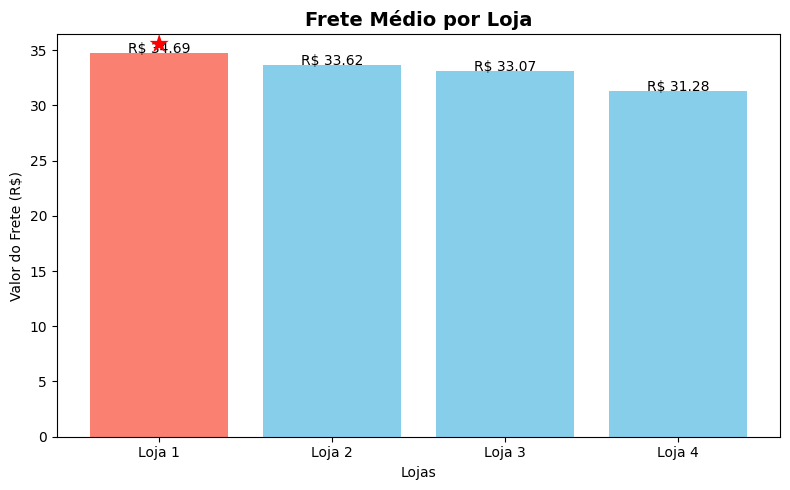

In [ ]:
# Grafico
import matplotlib.pyplot as plt

# Dados de frete médio de cada loja
fretes = [frete_medio_loja1, frete_medio_loja2, frete_medio_loja3, frete_medio_loja4]
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

# Identificar a loja com o maior frete
indice_max_frete = fretes.index(max(fretes))

# Cores: destaque na loja com o maior frete
cores = ['skyblue', 'skyblue', 'skyblue', 'skyblue']
cores[indice_max_frete] = 'salmon'  # Destaque para o maior frete

# Criando o gráfico
plt.figure(figsize=(8, 5))
barras = plt.bar(lojas, fretes, color=cores)

# Título e labels
plt.title('Frete Médio por Loja', fontsize=14, weight='bold')
plt.ylabel('Valor do Frete (R$)')
plt.xlabel('Lojas')

# Adicionando valores nas barras
for i, valor in enumerate(fretes):
    plt.text(i, valor + 0.05, f'R$ {valor:.2f}', ha='center', fontsize=10)

# Destaque com estrela na loja com maior frete
plt.text(indice_max_frete, fretes[indice_max_frete] + 0.15, '★', ha='center', fontsize=18, color='red')

# Exibindo o gráfico
plt.tight_layout()
plt.savefig('frete_medio_lojas.png', dpi=300)
plt.show()
fretes = [frete_medio_loja1, frete_medio_loja2, frete_medio_loja3, frete_medio_loja4]
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

# Identificar a loja com o maior frete
indice_max_frete = fretes.index(max(fretes))

# Cores: destaque na loja com o maior frete
cores = ['skyblue', 'skyblue', 'skyblue', 'skyblue']
cores[indice_max_frete] = 'salmon'  # Destaque para o maior frete

# Criando o gráfico
plt.figure(figsize=(8, 5))
barras = plt.bar(lojas, fretes, color=cores)

# Título e labels
plt.title('Frete Médio por Loja', fontsize=14, weight='bold')
plt.ylabel('Valor do Frete (R$)')
plt.xlabel('Lojas')

# Adicionando valores nas barras
for i, valor in enumerate(fretes):
    plt.text(i, valor + 0.05, f'R$ {valor:.2f}', ha='center', fontsize=10)

# Destaque com estrela na loja com maior frete
plt.text(indice_max_frete, fretes[indice_max_frete] + 0.15, '★', ha='center', fontsize=18, color='red')

# Exibindo o gráfico
plt.tight_layout()
plt.savefig('frete_medio_lojas.png', dpi=300)
plt.show()

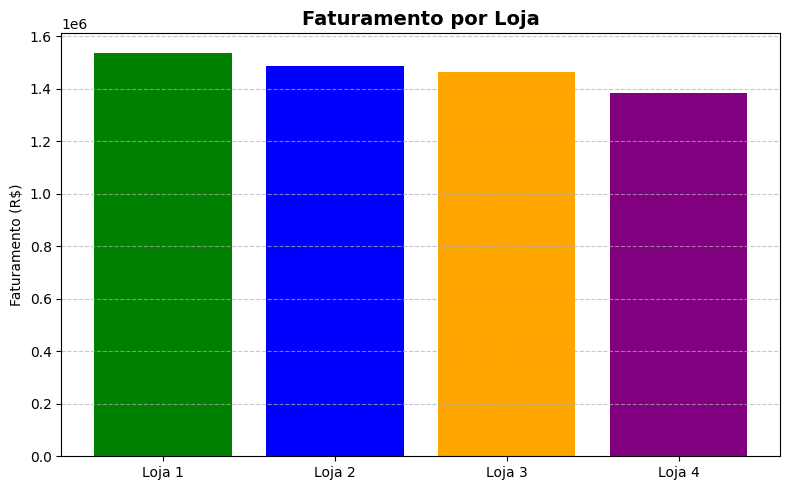

In [83]:
import matplotlib.pyplot as plt

lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
faturamentos = [faturamento_loja, faturamento_loja2, faturamento_loja3, faturamento_loja4]

plt.figure(figsize=(8,5))
plt.bar(lojas, faturamentos, color=['green', 'blue', 'orange', 'purple'])
plt.title('Faturamento por Loja', fontsize=14, fontweight='bold')
plt.ylabel('Faturamento (R$)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

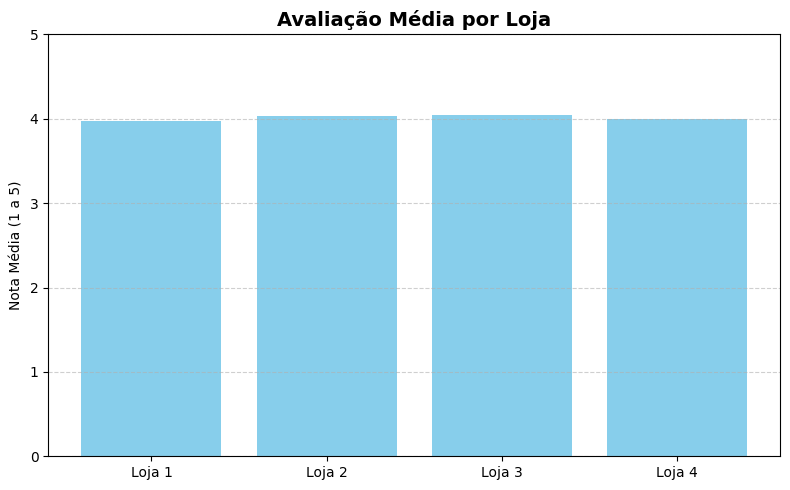

In [84]:
avaliacoes = [media_avaliacao_loja1, media_avaliacao_loja2, media_avaliacao_loja3, media_avaliacao_loja4]

plt.figure(figsize=(8,5))
plt.bar(lojas, avaliacoes, color='skyblue')
plt.title('Avaliação Média por Loja', fontsize=14, fontweight='bold')
plt.ylabel('Nota Média (1 a 5)')
plt.ylim(0, 5)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


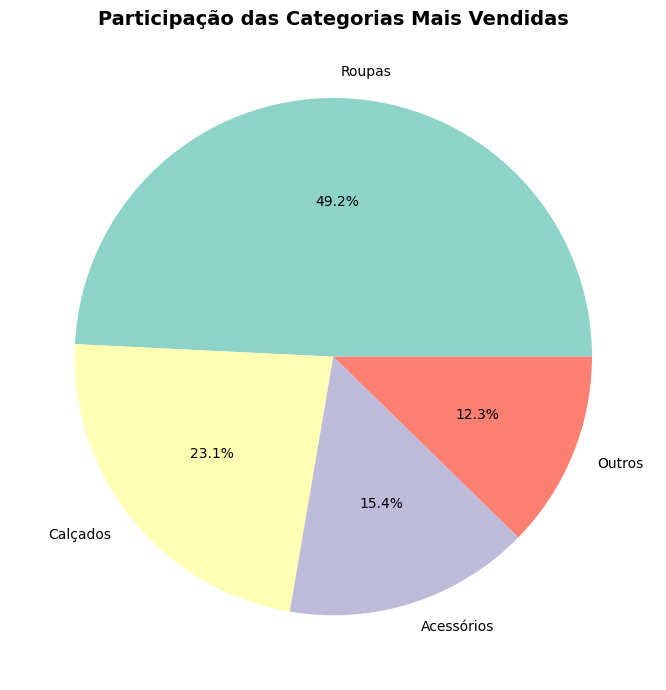

In [85]:
categorias = ['Roupas', 'Calçados', 'Acessórios', 'Outros']
vendas_por_categoria = [320, 150, 100, 80]  # Exemplo

plt.figure(figsize=(7,7))
plt.pie(vendas_por_categoria, labels=categorias, autopct='%1.1f%%', colors=plt.cm.Set3.colors)
plt.title('Participação das Categorias Mais Vendidas', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


Análise Geral e Recomendação Comercial

Após avaliar o faturamento, categorias de vendas, avaliação dos clientes, frete médio e desempenho dos produtos em cada loja, podemos traçar o seguinte cenário:

1. Loja com maior faturamento: A loja 1 se destaca em receita, o que indica uma boa aceitação no mercado. Vale a pena continuar investindo nela, melhorando ainda mais o atendimento e logística.


2. Categorias mais vendidas: A categoria de Roupas lidera nas vendas. Reforçar o estoque e promoções desse segmento pode aumentar ainda mais o faturamento.


3. Avaliação dos clientes: A loja com melhor avaliação deve ser usada como modelo de boas práticas (atendimento, entrega, experiência de compra). Já a loja com pior avaliação precisa de ações corretivas urgentes.


4. Frete médio: A loja 1 apresentou frete médio mais alto. Isso pode afetar a conversão de vendas. Avaliar parceiros logísticos ou subsidiar parte do frete pode melhorar os resultados.


5. Produtos mais e menos vendidos: Produtos que vendem pouco devem ser reavaliados ou retirados do catálogo para abrir espaço para itens mais rentáveis.




---

Decisão recomendada ao Sr. João
Mantenha a operação nas quatro lojas, mas com estratégias personalizadas para cada uma.

Invista mais na loja de maior desempenho e melhore a logística da loja com frete alto e baixa avaliação.

Foque nas categorias de maior venda e otimize o mix de produtos com base nos dados.

Utilize os insights como guia de marketing e estoque.